# Create Toy Data for Nucear Interaction (NI) analysis

In [59]:
import numpy as np
import matplotlib.pyplot as plt
print("numpy version = " + str(np.__version__))
import sys
print("python version = " + str(sys.version))

numpy version = 1.16.4
python version = 3.7.6 (default, Mar 13 2020, 15:31:01) 
[GCC 8.3.0]


In [72]:
# fix genrator seed:
np.random.seed(10)

def CalcRad(xpos, ypos):
    Rad = np.sqrt(np.square(xpos)+np.square(ypos))
    Rad_BP = np.sqrt(np.square(xpos-0.171)+np.square(ypos+0.176))
    Rad_BPIX = np.sqrt(np.square(xpos-0.086)+np.square(ypos+0.102))
    Rad_Tube = np.sqrt(np.square(xpos+0.080)+np.square(ypos+0.318))
    return Rad, Rad_BP, Rad_BPIX, Rad_Tube

def StructureGen(pos, lw, lw_corr, ngen, x0, y0):
    lenth = np.size(ngen)
    for i in range(0,lenth):
        r_gen = np.random.normal(loc=pos[i], scale=lw[i]/lw_corr[i], size=ngen[i])
        phi_gen = np.random.uniform(low=-np.pi, high=np.pi, size=ngen[i])
        x_gen = np.multiply(r_gen, np.cos(phi_gen)) + x0
        y_gen = np.multiply(r_gen, np.sin(phi_gen)) + y0
        z_gen = np.random.uniform(low=-25., high=25., size=ngen[i])
        if i == 0:
            x_str, y_str, z_str = x_gen, y_gen, z_gen
        else:
            x_str = np.concatenate(([x_str,x_gen]),axis=0)
            y_str = np.concatenate(([y_str,y_gen]),axis=0)
            z_str = np.concatenate(([z_str,z_gen]),axis=0)
    return x_str, y_str, z_str

def varGen(varName, varMean, varSigma, Rad):
    var_lenth = np.size(varName)
#     print("var_lenth size = " + str(np.size(varName)))
    sample_size = np.size(Rad)
    for i in range(0,var_lenth):
        varM = varMean[i]*(1. + Rad/50.) # small scale: with Raduis variable are changes slightly Rad between 0 and 25
        varS = varSigma[i]*(1. + Rad/50.)
#         print("varM shape = " + str(varM.shape))
        var_gen = np.random.normal(loc=varM, scale=varS, size=sample_size)
        if i == 0:
            var_tot = var_gen
        else:
            var_tot = np.c_[var_tot,var_gen]

    return var_tot

scale = 1 # should be int
# generate background:
# https://en.wikipedia.org/wiki/Noncentral_chi-squared_distribution
n_bkg = 500000*scale
r_bkg   = np.random.noncentral_chisquare(df=3, nonc=2, size=n_bkg)
r_bkg   = r_bkg + 1.
phi_bkg = np.random.uniform(low=-np.pi, high=np.pi, size=n_bkg)
x_bkg = np.multiply(r_bkg, np.cos(phi_bkg))
y_bkg = np.multiply(r_bkg, np.sin(phi_bkg))
z_bkg = np.random.uniform(low=-25., high=25., size=n_bkg)

# beam pipe position and Radius is taken from CMS-DP-2019-001 (http://cds.cern.ch/record/2664786?ln=en)
# generate beam pipe (BP):
n_BP = [30000*scale]
# in R_BP centered at BP
xSignal_BP =    [2.21]
lw_Signal_BP =  [0.1]
lw_corr_BP =    [3.5]
x0_BP, y0_BP = 0.171, -0.176
x_BP, y_BP, z_BP = StructureGen(xSignal_BP, lw_Signal_BP, lw_corr_BP, n_BP, x0_BP, y0_BP)


# BPIX position is taken from Figure. 4.1 at CMS-TDR-11 (https://cds.cern.ch/record/1481838?ln=en)
# generate BPIX:  
#          Inner Shield      L1_1    L1_2    L2_1  L2_2     L3_1   L3_2      L4_1   L4_2   Outer Shield      
# xSignal_BPIX = [2.49,        2.78,    3.01,   6.61, 6.90,    10.73, 11.02,    15.84, 16.13, 18.45]
xSignal_BPIX =   [2.49,        2.8,     3.10,   6.65, 6.98,    10.80, 11.10,    15.84, 16.13, 18.65]
lw_Signal_BPIX =  [0.055,    0.2,    0.2,    0.2,  0.2,     0.2,  0.2,   0.2,    0.2,   0.2]
lw_corr_BPIX  =   [2.,        3.,      3.,    3.,     3.,    3.,      3.,   3.,     3.,    3.]
n_BPIX =       [2000,        10000,   10000,   6000, 6000,  4000,  4000,     3000, 3000,   1000]
print("n_BPIX  befor = " +str(n_BPIX ))
n_BPIX = np.multiply(n_BPIX,scale)
print("n_BPIX  after = " +str(n_BPIX ))

x0_BPIX, y0_BPIX = 0.086, -0.102
x_BPIX, y_BPIX, z_BPIX = StructureGen(xSignal_BPIX, lw_Signal_BPIX, lw_corr_BPIX, n_BPIX, x0_BPIX, y0_BPIX)

#tube position and Radius is taken from CMS-DP-2019-001 (http://cds.cern.ch/record/2664786?ln=en)
# generate Tube:
xSignal_Tube   =  [21.75] # avarige of Rx and Ry
lw_Signal_Tube =  [0.4]
lw_corr_Tube =    [3.5]
n_Tube = [10000*scale]
x0_Tube, y0_Tube = -0.080, -0.318
x_Tube, y_Tube, z_Tube = StructureGen(xSignal_Tube, lw_Signal_Tube, lw_corr_Tube, n_Tube, x0_Tube, y0_Tube)

#Rails position and Radius is taken from CMS-DP-2019-001 (http://cds.cern.ch/record/2664786?ln=en)
# generate Rails:
n_Rails = 1000*scale
ySignal_TopRail = 19.08
ySignal_BotRail = -19.73
lw_yRail = 1.
xmin, xmax = -5, 5
x_TopRail = np.random.uniform(low=xmin, high=xmax, size=n_Rails)
y_TopRail = np.random.uniform(low=ySignal_TopRail, high=(ySignal_TopRail+lw_yRail), size=n_Rails)
z_TopRail = np.random.uniform(low=-25., high=25., size=n_Rails)
x_BotRail = np.random.uniform(low=xmin, high=xmax, size=n_Rails)
y_BotRail = np.random.uniform(low=(ySignal_BotRail-lw_yRail), high=ySignal_BotRail, size=n_Rails)
z_BotRail = np.random.uniform(low=-25., high=25., size=n_Rails)

x_sig = np.concatenate(([x_BP,x_BPIX,x_Tube,x_TopRail,x_BotRail]),axis=0)
y_sig = np.concatenate(([y_BP,y_BPIX,y_Tube,y_TopRail,y_BotRail]),axis=0)
z_sig = np.concatenate(([z_BP,z_BPIX,z_Tube,z_TopRail,z_BotRail]),axis=0)
x = np.concatenate(([x_bkg,x_sig]),axis=0)
y = np.concatenate(([y_bkg,y_sig]),axis=0)
z = np.concatenate(([z_bkg,z_sig]),axis=0)

print("x shape = " +str(x.shape))
print("y shape = " +str(y.shape))
print("z shape = " +str(z.shape))

lenth_sig = np.size(x_sig)
lenth_bkg = np.size(x_bkg)
# create 23 input variables with gaussian, the same sigma for S and B, but 10% larger in S for mean 

var_Name     =  np.asarray(["ver", "NI", "pT1","pT2", "pT3", "eta1", "eta2", "eta3", "phi1",  "phi2", "phi3", 
                 "chi2_1", "chi2_2", "chi2_3", "normchi2_1", "normchi2_2","normchi2_3",
                 "hits1","hits2", "hits3", "algo1", "algo2", "algo3"])
# print("var_Name shape = " + str(var_Name.shape))
var_Mean_Sig =  np.asarray([20.,   1.1,   1.5,  1.,    0.5,   0.,     0.,       0.,      0.,     0.,     0.,
                 20.,      15.,      12.,    1.2,         1.,          0.8,
                 20.,  15.,  10.,           10., 9., 8.])
var_Sigma =     np.asarray([10.,   0.3,   0.3, 0.3,    0.3,   1.,    1.,       1.,   np.pi,  np.pi, np.pi,
                 10.,    8.,         5.,    0.5,          0.4,         0.3,
                 5.,   4.,    3.,           5.,  4., 3.])
# mean less/more by 0-10% of sigma generated randomly
# fracRandom = z_BotRail = np.random.uniform(low=-0.5, high=0.5, size=var_Sigma.size) # half-by-half NN separation power
fracRandom = z_BotRail = np.random.uniform(low=-1., high=1., size=var_Sigma.size)
var_Mean_Bkg = var_Mean_Sig-np.multiply(fracRandom,var_Sigma)
print("fracRandom = " + str(fracRandom))

# generate signal input variables:
Radius = CalcRad(x_sig,y_sig)[0]
var_Signal = varGen(var_Name, var_Mean_Sig, var_Sigma, np.asarray(Radius))

# generate background input variables:
Radius = CalcRad(x_bkg,y_bkg)[0]
var_Bkg = varGen(var_Name, var_Mean_Bkg, var_Sigma, np.asarray(Radius))

print("var_Signal shape = " + str(var_Signal.shape))
print("var_Bkg shape = " + str(var_Bkg.shape))

# merge Signal and Background
var = np.r_[var_Bkg,var_Signal]
print("var shape = " + str(var.shape))

# merge var and positions 1st bkg, after signal
num = np.asarray(range(0,np.size(x)))
Xdata = np.c_[num,np.asarray(x),np.asarray(y),np.asarray(z),var]
print("Xdata.shape = " + str(Xdata.shape))

n_BPIX  befor = [2000, 10000, 10000, 6000, 6000, 4000, 4000, 3000, 3000, 1000]
n_BPIX  after = [ 2000 10000 10000  6000  6000  4000  4000  3000  3000  1000]
x shape = (591000,)
y shape = (591000,)
z shape = (591000,)
fracRandom = [-0.19246673  0.15231096  0.79219197  0.57250346 -0.77193521 -0.08734071
  0.72362562  0.29567183 -0.30053404  0.12570818  0.40234362 -0.12592116
 -0.21364343 -0.89395433  0.15156263  0.64243351 -0.82408561 -0.23985279
 -0.9147548   0.26267606  0.08002083  0.43195771  0.32715363]
var_Signal shape = (91000, 23)
var_Bkg shape = (500000, 23)
var shape = (591000, 23)
Xdata.shape = (591000, 27)


In [73]:
# save Xdata to file:
import os

fcsv = "Results/ToyData.csv"
os.system('rm ' + fcsv)
filecsv = open(fcsv,'wb')
np.savetxt(filecsv, Xdata, delimiter=',',fmt='%f', newline = "\n")
filecsv.close()

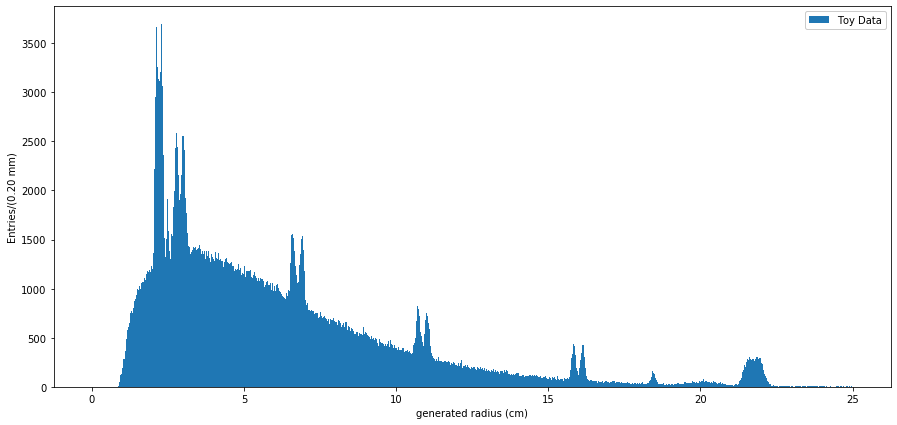

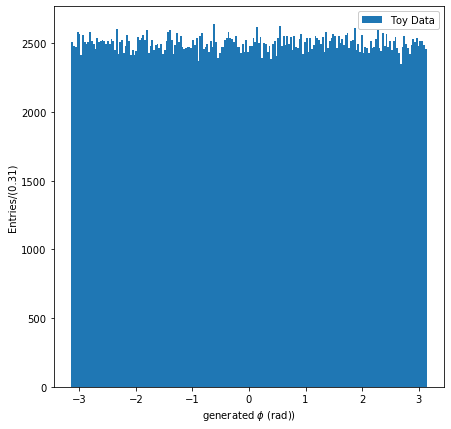

In [29]:
Radius, Radius_BP, Radius_BPIX, Radius_Tube = CalcRad(x,y)

# Rad = Radius_BP
Rad = Radius_BPIX

fig, ax = plt.subplots(1,1,  figsize=(15,7)) 

labelData = "Toy Data"
# Rmin, Rmax = 1.5, 3.
Rmin, Rmax = 0, 25.
num_bins = 1250
n, bins, patches = ax.hist(Rad[np.logical_and(Rad > Rmin, Rad < Rmax)], num_bins,
                           range = [Rmin, Rmax],label=labelData)

ax.legend(loc="upper right",framealpha=1.)
ax.set_xlabel('generated radius (cm)')
ax.set_ylabel('Entries/(%1.2f mm)'%(10*(bins[1]-bins[0]))) 
plt.savefig('Results/Toy_Radius.pdf')
plt.show()

fig, ax = plt.subplots(1,1,  figsize=(7,7))
Rmin, Rmax = -np.pi, np.pi
num_bins = 200
n, bins, patches = ax.hist(phi_bkg[np.logical_and(phi_bkg > Rmin, phi_bkg < Rmax)], num_bins,
                           range = [Rmin, Rmax],label=labelData)

ax.legend(loc="upper right",framealpha=1.)
ax.set_xlabel('generated $\phi$ (rad))')
ax.set_ylabel('Entries/(%1.2f)'%(10*(bins[1]-bins[0]))) 
plt.savefig('Results/Toy_Radius.pdf')
plt.show()
